Работа Кашириной Татьяны ММР 212

Датасет содержит данные о выборке женщин, некоторые из которых больны диабетом. Необходимо выявить корреляцию между одной из переменных и результатом (наличием или отсутствием заболевания диабетом)

In [1]:
import numpy as np #импорт библиотеки numpy
import pandas as p #импорт бибилиотеки pandas
import scipy.stats as s #импорт библиотеки scipy
import matplotlib.pyplot as mp #импорт библиотеки matplotlib

In [2]:
df = p.read_csv('diabetes.csv') #импорт файла данных в формате csv
df.head(10) #отображаю импортированные данные. Визуально проверяю корректность первых 10 значений

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info() #определяю размеры датасета, чтобы узнать, достаточный ли размер выборки. Смотрю, есть ли пустые значения (результат - нет)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['SkinThickness'].unique() #все значения, которыми характеризуется толщина кожи

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [5]:
df[df['SkinThickness'] == 0].shape #смотрю, у какого числа респондентов толщина кожи = 0

(227, 9)

В результате в 227 случаях оказалось значение толщины кожи - 0. Для такого параметра значение 0 не допустимо, соответственно не смотря на результаты функции info, в массиве присутствуют пустые (нулевые) значения

In [6]:
df[(df['BMI'].isin(range(18, 30))) | (df['BMI'] == 0)].shape # смотрю, у какого числа респондентов индекс массы тела в нормальных пределах либо не заполнен

(42, 9)

Всего у 42 из 768 пациентов значение ИМТ оказалось нормальным, либо неизвестным

Для параметров Glucose (сахар в крови), BloodPressure (давление), SkinThickness (толщина кожи), Insulin (кол-во вырабатываемого инсулина), BMI (индекс массы тела)  значения 0 невозможны. Следовательно это не заполненные значения. Заменю их на NaN

In [7]:
df.loc[df['Glucose'] == 0, 'Glucose'] = np.nan
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = np.nan
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = np.nan
df.loc[df['Insulin'] == 0, 'Insulin'] = np.nan
df.loc[df['BMI'] == 0, 'BMI'] = np.nan
print(df['SkinThickness'])

0      35.0
1      29.0
2       NaN
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766     NaN
767    31.0
Name: SkinThickness, Length: 768, dtype: float64


In [8]:
df.sort_values(by='Age') #отсортировала данные по возрасту. Проверила, что респондентов младше 21 года и пустых значений нет

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
255,1,113.0,64.0,35.0,NaN,33.6,0.543,21,1
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
102,0,125.0,96.0,NaN,NaN,22.5,0.262,21,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
623,0,94.0,70.0,27.0,115.0,43.5,0.347,21,0
...,...,...,...,...,...,...,...,...,...
123,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0
666,4,145.0,82.0,18.0,NaN,32.5,0.235,70,1
453,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0


В США и некоторых европейских странах уровень сахара измеряют в в миллиграммах на децилитр, хотя международная и используемая в России система - миллимоль на литр. 1 ммоль/л = 18 мг/дл. Далее переведем значения в привычные для России

In [9]:
df['GlukoseRU'] = df['Glucose']/18 #создаю новый столбец с измененными данными по глюкозе и проверяю корректность
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlukoseRU
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,8.222222
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,4.722222
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,10.166667
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,4.944444
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,7.611111
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,6.444444
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,4.333333
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,6.388889
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,10.944444
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,6.944444


In [10]:
df['Outcome'] = df['Outcome'] == 1 #преобразую числовую переменную результатов исследований в переменную логического типа. True - у пациента диабет, False - диабета нет
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlukoseRU
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,True,8.222222
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,False,4.722222
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,True,10.166667
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,False,4.944444
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,True,7.611111
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,False,6.444444
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,True,4.333333
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,False,6.388889
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,True,10.944444
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,True,6.944444


In [11]:
df['Pregnancies'].value_counts() #считаю количество респондентов с каждым из количеств беременностей

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [12]:
df['Outcome'].value_counts() #смотрю, сколько из респондентов диабетики, а сколько - нет

False    500
True     268
Name: Outcome, dtype: int64

In [13]:
#Видим, что примерно 1/3 респондентов больны диабетом. Посмотрим, останется ли пропорция той же по каждому из количеств беременностей

In [14]:
df.groupby('Pregnancies')['Outcome'].sum()

Pregnancies
0     38
1     29
2     19
3     27
4     23
5     21
6     16
7     25
8     22
9     18
10    10
11     7
12     4
13     5
14     2
15     1
17     1
Name: Outcome, dtype: int64

Вывод - количество беременностей не влияет на развитие диабета

<AxesSubplot: >

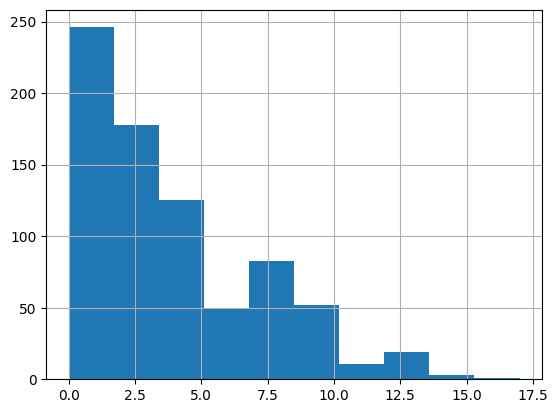

In [15]:
df['Pregnancies'].hist() #распределение по кол-ву беременностей. Гистограмма

In [16]:
df.describe() #рассчитываю меры центральной тенденции и вариативности

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GlukoseRU
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,763.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,6.760376
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,1.696425
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,2.444444
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,5.500000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,6.500000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,7.833333
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,11.055556


0    5.500000
1    5.555556
Name: GlukoseRU, dtype: float64


<AxesSubplot: >

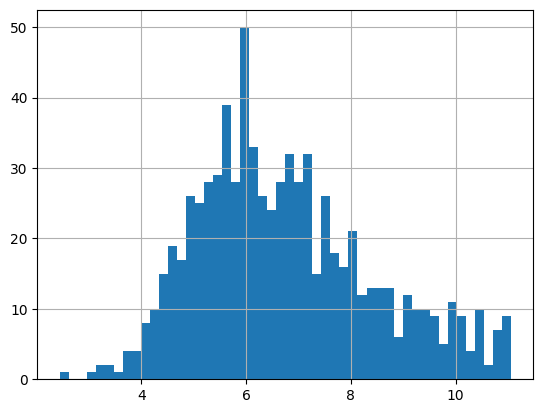

In [17]:
print(df['GlukoseRU'].mode()) #смотрю моды для показателя сахара в крови. Ожидала увидеть 2 моды - для больных и здоровых, но в целом моды на уровне нормального значения сахара
df['GlukoseRU'].hist(bins=50)

<AxesSubplot: >

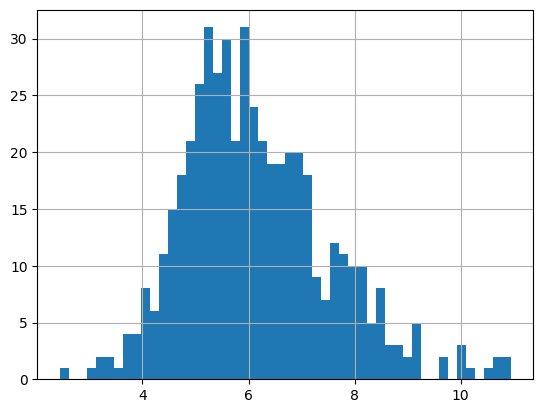

In [18]:
df.loc[(df['Outcome'] == 0), 'GlukoseRU'].hist(bins=50) #посмотрим то же но только для здоровых респондентов. Видим, что правая сторона графика стала заметно более редкой

0    6.944444
Name: GlukoseRU, dtype: float64


<AxesSubplot: >

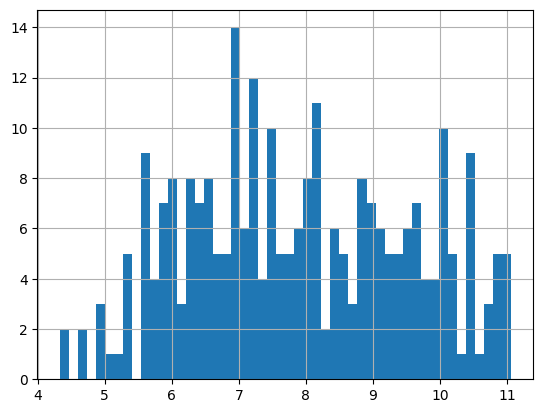

In [19]:
print(df.loc[(df['Outcome'] == 1), 'GlukoseRU'].mode())
df.loc[(df['Outcome'] == 1), 'GlukoseRU'].hist(bins=50) #у больных респондентов распределенее сахара более равномерное, без пика в районе нормального значения сахара. Мода для больных респондентов чуть ниже значения в 7

0    105.0
Name: Insulin, dtype: float64
0    130.0
Name: Insulin, dtype: float64


<AxesSubplot: >

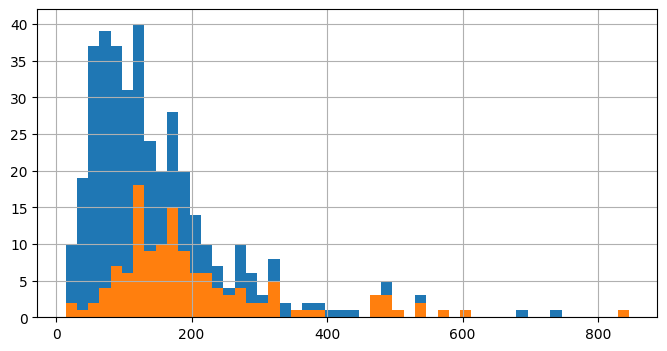

In [20]:
print(df['Insulin'].mode())
print(df.loc[(df['Outcome'] == 1), 'Insulin'].mode()) # мода параметра Insulin как и GlukoseRU тоже смещена вверх у респондентов с диабетом

df['Insulin'].hist(bins=50, figsize = (8, 4))
df.loc[(df['Outcome'] == 1), 'Insulin'].hist(bins=50, figsize = (8, 4))

<AxesSubplot: xlabel='Age'>

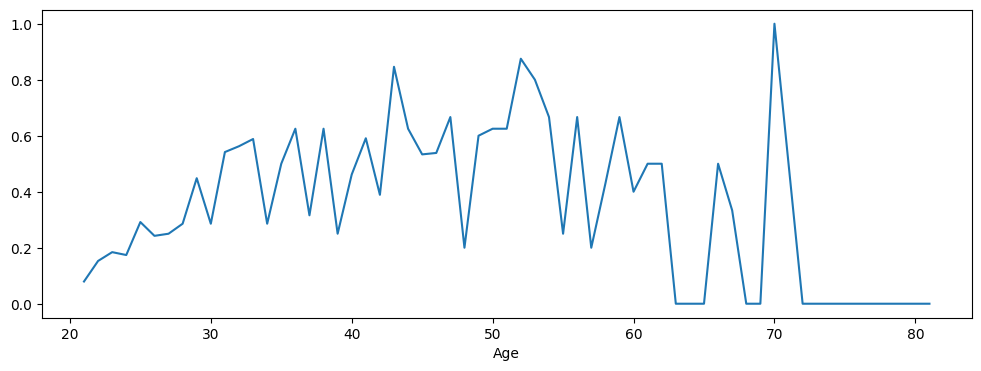

In [21]:
df.groupby('Age')['Outcome'].mean().plot(figsize = (12, 4)) #для логической переменной Outcome функция mean показывает вероятность. Смотрю, повышается ли она с возрастом

In [22]:
#найдем моды и медианы по всем показателям датасета отдельно для больных диабетом и здоровых респондентов
print(df.groupby('Outcome')['Pregnancies'].agg(['mean', 'median']), 'Pregnancies') 
print(df.groupby('Outcome')['BloodPressure'].agg(['mean', 'median']), 'BloodPressure') 
print(df.groupby('Outcome')['SkinThickness'].agg(['mean', 'median']), 'SkinThickness')
print(df.groupby('Outcome')['Insulin'].agg(['mean', 'median']), 'Insulin')
print(df.groupby('Outcome')['BMI'].agg(['mean', 'median']), 'BMI') 
print(df.groupby('Outcome')['DiabetesPedigreeFunction'].agg(['mean', 'median']), 'DiabetesPedigreeFunction') 
print(df.groupby('Outcome')['Age'].agg(['mean', 'median']), 'Age') 
print(df.groupby('Outcome')['GlukoseRU'].agg(['mean', 'median']), 'GlukoseRU') 

             mean  median
Outcome                  
False    3.298000     2.0
True     4.865672     4.0 Pregnancies
              mean  median
Outcome                   
False    70.877339    70.0
True     75.321429    74.5 BloodPressure
              mean  median
Outcome                   
False    27.235457    27.0
True     33.000000    32.0 SkinThickness
               mean  median
Outcome                    
False    130.287879   102.5
True     206.846154   169.5 Insulin
              mean  median
Outcome                   
False    30.859674    30.1
True     35.406767    34.3 BMI
             mean  median
Outcome                  
False    0.429734   0.336
True     0.550500   0.449 DiabetesPedigreeFunction
              mean  median
Outcome                   
False    31.190000    27.0
True     37.067164    36.0 Age
             mean    median
Outcome                    
False    6.146881  5.944444
True     7.906642  7.777778 GlukoseRU


Резутьтаты выше показывают, что все показатели выше у больных, чем у здоровых. Расшифровка требует дополнительных знаний в медицине, но из бытовых знаний можно понять, что отличия по показателям Pregnancies, BloodPressure - незначительные, в то время как по остальным это может говорить о наличии корреляции

Наибольная разница между больными и здоровыми респондентами наблюдается по показателям Insulin и DiabetesPedigreeFunction - практически в 1.5 раза. У параметра инсулин при этом много пропущенных значений в то время как предрасположенность к диабету заполнена у всех. 
Далее предположим, что функция предрасположенности действительно должна быть разной для больных и здоровых и "нормальные" значения тоже различны. Выполним z-оценку исходя из этого предположения

In [23]:
#посчитаю разброс и среднеквадратичное отклонение для индекса массы тела отдельно по здоровым и больным
print(df.groupby('Outcome')['DiabetesPedigreeFunction'].var()) 
print(df.groupby('Outcome')['DiabetesPedigreeFunction'].std())

Outcome
False    0.089452
True     0.138648
Name: DiabetesPedigreeFunction, dtype: float64
Outcome
False    0.299085
True     0.372354
Name: DiabetesPedigreeFunction, dtype: float64


In [24]:
diabet = df[df['Outcome'] == 1] #выделю в отдельный датасет больных диабетом
print(diabet)
nodiabet = df[df['Outcome'] == 0] #выделю в отдельный датасет больных диабетом
print(nodiabet)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
2              8    183.0           64.0            NaN      NaN  23.3   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1    128.0           88.0           39.0    110.0  36.5   
757            0    123.0           72.0            NaN      NaN  36.3   
759            6    190.0           92.0            NaN      NaN  35.5   
761            9    170.0           74.0           31.0      NaN  44.0   
766            1    126.0           60.0            NaN      NaN  30.1   

     DiabetesPedigreeFunction  Age  Outcome  GlukoseRU  
0                       0.627   50     True   8.222222

In [25]:
#рассчитаю z-оценку для больных диабетом по показателю генетической предрасположенности
diabet['Z-score_PedigreeFunc'] = s.stats.zscore(diabet['DiabetesPedigreeFunction']) 
diabet.head()

C:\Users\Tanya\AppData\Local\Temp\ipykernel_15024\2778370328.py:2: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  diabet['Z-score_PedigreeFunc'] = s.stats.zscore(diabet['DiabetesPedigreeFunction'])
C:\Users\Tanya\AppData\Local\Temp\ipykernel_15024\2778370328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabet['Z-score_PedigreeFunc'] = s.stats.zscore(diabet['DiabetesPedigreeFunction'])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlukoseRU,Z-score_PedigreeFunc
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,True,8.222222,0.205834
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,True,10.166667,0.326912
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,True,7.611111,4.674983
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,True,4.333333,-0.813918
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,True,10.944444,-1.056075


In [26]:
#рассчитаю z-оценку для здоровых респондентов по показателю генетической предрасположенности
nodiabet['Z-score_PedigreeFunc'] = s.stats.zscore(nodiabet['DiabetesPedigreeFunction']) 
nodiabet.head()

C:\Users\Tanya\AppData\Local\Temp\ipykernel_15024\857348688.py:2: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  nodiabet['Z-score_PedigreeFunc'] = s.stats.zscore(nodiabet['DiabetesPedigreeFunction'])
C:\Users\Tanya\AppData\Local\Temp\ipykernel_15024\857348688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodiabet['Z-score_PedigreeFunc'] = s.stats.zscore(nodiabet['DiabetesPedigreeFunction'])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlukoseRU,Z-score_PedigreeFunc
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,False,4.722222,-0.263513
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,False,4.944444,-0.879338
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,False,6.444444,-0.765544
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,False,6.388889,-0.989785
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,False,6.111111,-0.799013


<AxesSubplot: >

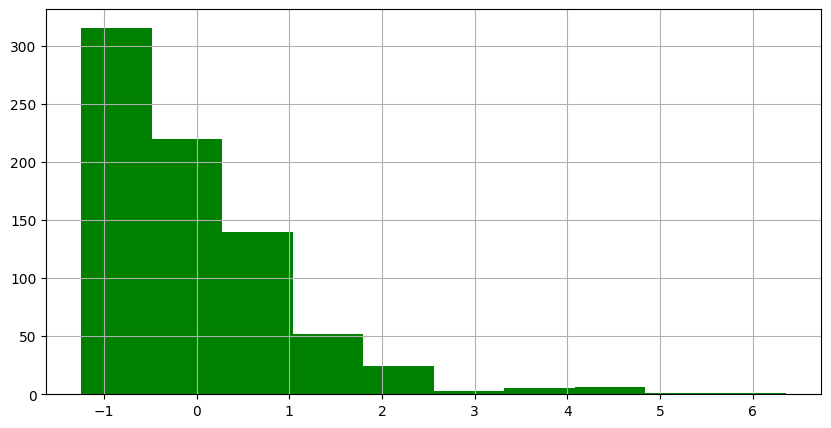

In [27]:
new_df = p.concat([diabet, nodiabet]) #выведем z-оценку в виде диаграммы
new_df['Z-score_PedigreeFunc'].hist(figsize = (10, 5), color = 'green')

In [28]:
new_df[new_df['Z-score_PedigreeFunc'] > 3]
# нашли значительные отклонения как среди больных, так и среди здоровых по показателю DiabetesPedigreeFunction

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlukoseRU,Z-score_PedigreeFunc
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,True,7.611111,4.674983
45,0,180.0,66.0,39.0,NaN,42.0,1.893,25,True,10.000000,3.612181
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25,True,9.611111,4.268696
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,True,10.000000,5.030147
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,False,7.722222,3.384582
58,0,146.0,82.0,NaN,NaN,40.5,1.781,44,False,8.111111,4.522520
147,2,106.0,64.0,35.0,119.0,30.5,1.400,34,False,5.888889,3.247360
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,False,10.944444,6.356608
330,8,118.0,72.0,19.0,NaN,23.1,1.476,46,False,6.555556,3.501723
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,False,6.555556,4.355176


Когда ранее были рассчитаны меры центральной тенденции и вариативности, для переменной BIM минимальное и максимальное значения вызвали сомнения. Они сильно отличались от значений первой и третей квартили. Найдем выбросы в этой переменной

In [29]:
#рассчитываю 1 и 3 квартили и интерквартильный размах
q1 = np.nanpercentile(new_df['BMI'], 25)
q3 = np.nanpercentile(new_df['BMI'], 75)
iqr = q3 - q1

print(q1, q3, iqr)

27.5 36.6 9.100000000000001


In [30]:
#рассчитываю верхнюю и нижнюю границы
iqr_b = q1 - (iqr * 1.5)
iqr_t = q3 + (iqr *1.5)
print(iqr_b, iqr_t)

13.849999999999998 50.25


In [31]:
new_df[(new_df['BMI'] < iqr_b) | (new_df['BMI'] > iqr_t)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GlukoseRU,Z-score_PedigreeFunc
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,True,9.000000,0.560998
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,True,4.888889,-0.146640
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,True,7.166667,-0.622883
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,True,7.500000,0.073993
303,5,115.0,98.0,NaN,NaN,52.9,0.209,28,True,6.388889,-0.918853
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,True,10.000000,5.030147
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,False,9.166667,-0.009150
673,3,123.0,100.0,35.0,240.0,57.3,0.880,22,False,6.833333,1.506985


Видим, что все выбрасы в большую сторону, то есть людей с недостатком массы тела, который был бы выбросом, нет. 
Выбросы в основном среди больных диабетом, хотя и среди здоровых встречаются.
Практически все выбросы - это молодые люди
У всех выбросов кроме одного уровень глюкозы выше модального и медианного значений

Рассчитаю корреляции между каждым из параметров и результатом

In [32]:
print('Corr_Preg = ', new_df['Pregnancies'].corr(new_df['Outcome']))
print('Corr_BloodP = ', new_df['BloodPressure'].corr(new_df['Outcome']))
print('Corr_Skin = ', new_df['SkinThickness'].corr(new_df['Outcome']))
print('Corr_Insulin = ', new_df['Insulin'].corr(new_df['Outcome']))
print('Corr_BMI = ', new_df['BMI'].corr(new_df['Outcome']))
print('Corr_Pedigree = ', new_df['DiabetesPedigreeFunction'].corr(new_df['Outcome']))
print('Corr_Age = ', new_df['Age'].corr(new_df['Outcome']))
print('Corr_Glukose = ', new_df['GlukoseRU'].corr(new_df['Outcome']))

Corr_Preg =  0.22189815303398613
Corr_BloodP =  0.17058928446068458
Corr_Skin =  0.2594914221646609
Corr_Insulin =  0.30345425200567616
Corr_BMI =  0.3136804821984417
Corr_Pedigree =  0.17384406565295984
Corr_Age =  0.23835598302719754
Corr_Glukose =  0.4946502590810317


Наибольшая корреляция наблюдается между уровнем сахара и наличием заболевания диабетом
Слабая корреляция также наблюдается по показателю индекса массы тела и инсулину

В целях исследования нет необходимости находить корреляцию между какими-либо другими параметрами кроме заболевания диабетом, однако в дальнейшем исследование может быть продолжено, чтобы найти зависимости второго уровня